In [2]:
import pandas as pd    # for reading and manipulating tabular data
import networkx as nx  # for constructing and studying networks
import numpy as np     # for arrays
#import community           # for community structure later
import collections          # for manipulation tuples and zipping objects
import statistics as stats  # for generating summary statistics
import time                 # for measuring computating time
from matplotlib import pyplot as plt  # for outputting nice plots
import seaborn as sns                 # for creating even nicer plots

#get_ipython().magic(u'matplotlib inline')

In [3]:
phases = {}
phases_raw = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases_raw[i] = phases[i].copy()
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

nnodes [15, 24, 33, 33, 32, 27, 36, 42, 34, 42, 41]
nedges [18, 28, 56, 48, 39, 47, 49, 58, 44, 50, 50]


Text(0.5, 1.0, '# correspondences for each phase')

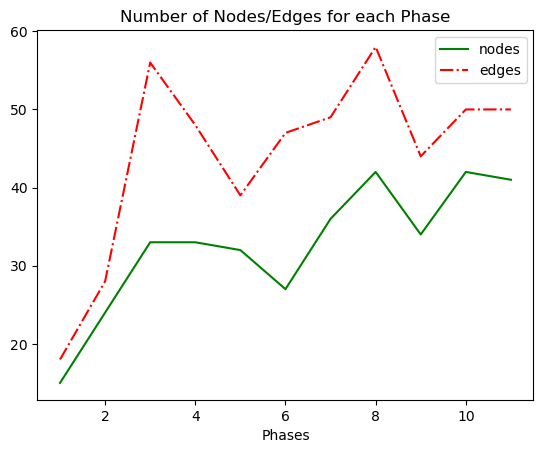

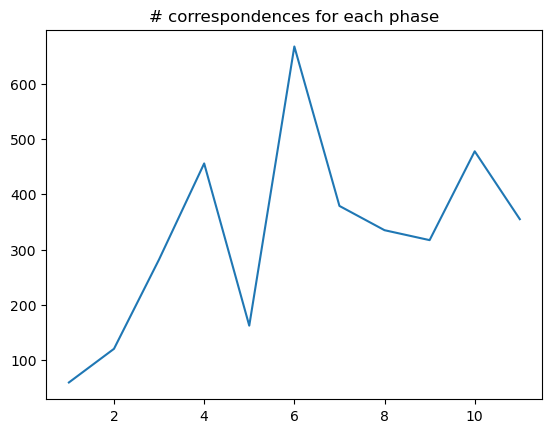

In [35]:
nnodes = []
nedges = []
keys = []
for k in G:
  nnodes += [G[k].number_of_nodes()]
  nedges += [G[k].number_of_edges()]
  keys += [k]

print( f'nnodes {nnodes}')
print( f'nedges {nedges}')

plt.plot(keys, nnodes, 'g', label='nodes')
plt.plot(keys, nedges, 'r-.',  label='edges')
plt.legend()
plt.title('Number of Nodes/Edges for each Phase')
plt.xlabel('Phases')

plt.figure()
corresp = [phases_raw[k].sum().sum() for k in phases_raw]
plt.plot(range(1,12),corresp)
plt.title("# correspondences for each phase")

In [5]:
nodes23="n1,n3,n83,n86,n85,n6,n11,n88,n106,n89,n84,n5,n8,n76,n77,n87,n82,n96,n12,n17,n80,n33,n16"
nodes23=sorted(str.split(nodes23,","))
print(f'confirm 23 = {len(nodes23)}')

def dict_filter(dictIn, keysIn):
    return {key: dictIn[key] for key in dictIn if key in keysIn}

def dicts2dframe(dicts):
    dfall = pd.DataFrame()
    for i in range(1, len(dicts)+1):
        df = pd.DataFrame.from_dict(dicts[i-1], orient='index', columns=[f'ph{i}'])
        dfall = pd.concat([dfall, df], axis=1)
    return dfall.fillna(0)
    

confirm 23 = 23


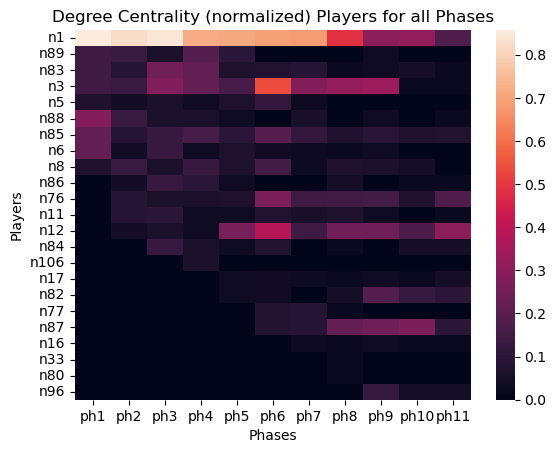

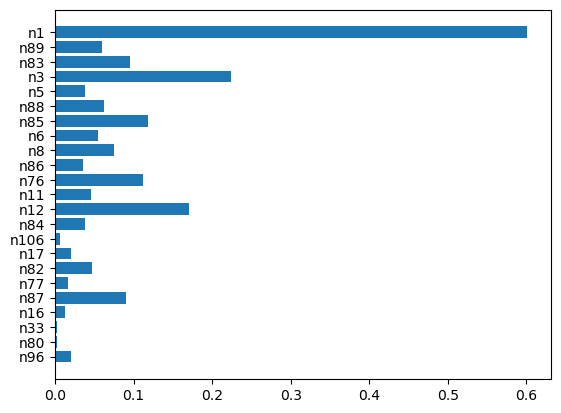

In [38]:
degcen_dicts = [dict_filter(nx.degree_centrality(G[ph]), nodes23) for ph in range(1,12)]
degcen_df = dicts2dframe(degcen_dicts)

sns.heatmap(degcen_df)
plt.title('Degree Centrality (normalized) Players for all Phases')
plt.xlabel('Phases')
plt.ylabel('Players')
plt.show()

def show_mean(df):
    d_mean = df.mean(1)

    ax = plt.barh(df.index.to_list(), d_mean.to_list())
    plt.gca().invert_yaxis()
    plt.show()
show_mean(degcen_df)

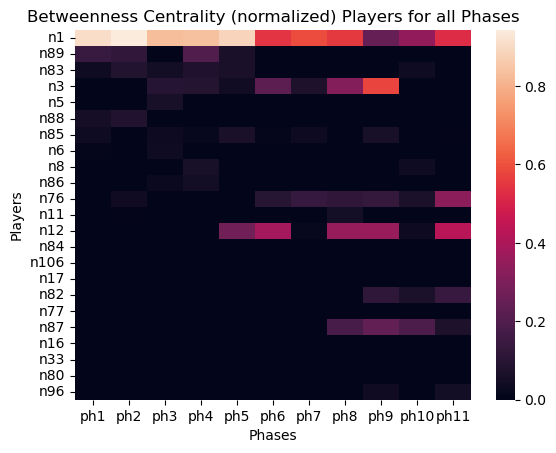

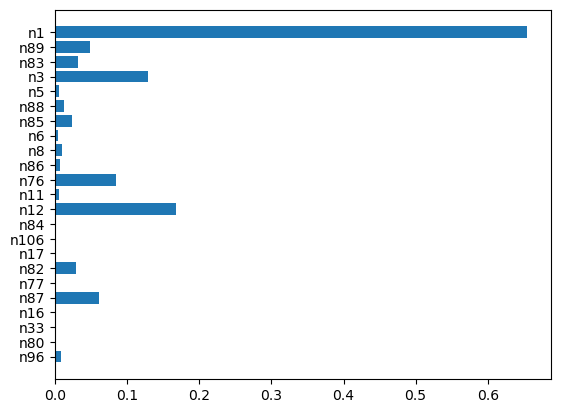

In [37]:
betcen_dicts = [dict_filter(nx.betweenness_centrality(G[ph], normalized = True), nodes23) for ph in range(1,12)]
betcen_df = dicts2dframe(betcen_dicts)

sns.heatmap(betcen_df)
plt.title('Betweenness Centrality (normalized) Players for all Phases')
plt.xlabel('Phases')
plt.ylabel('Players')
plt.show()
show_mean(betcen_df)

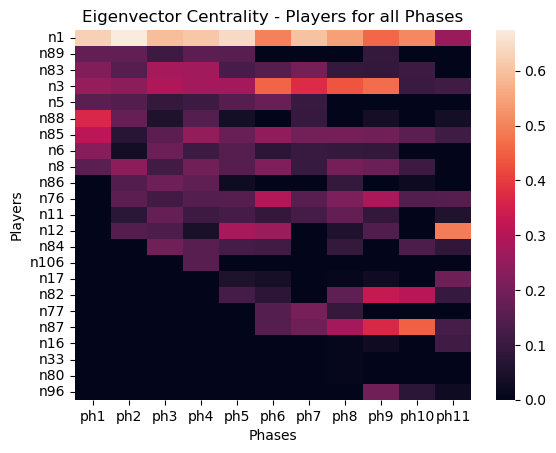

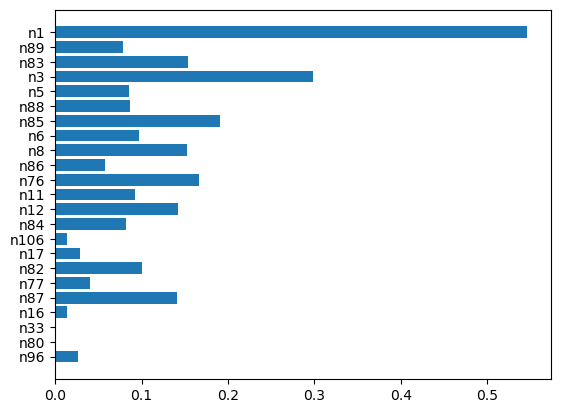

In [36]:
eigcen_dicts = [dict_filter(nx.eigenvector_centrality(G[ph]), nodes23) for ph in range(1,12)]
eigcen_df = dicts2dframe(eigcen_dicts)

sns.heatmap(eigcen_df)
plt.title('Eigenvector Centrality - Players for all Phases')
plt.xlabel('Phases')
plt.ylabel('Players')
plt.show()
show_mean(eigcen_df)

even though num nodes/edges did not increase, more central/hubs appeared - the network became more decentralized

In [39]:
G

{1: <networkx.classes.graph.Graph at 0x23f1feff370>,
 2: <networkx.classes.graph.Graph at 0x23f1ffd8340>,
 3: <networkx.classes.graph.Graph at 0x23f1ffd8af0>,
 4: <networkx.classes.graph.Graph at 0x23f1ffd8e80>,
 5: <networkx.classes.graph.Graph at 0x23f1ffd8f70>,
 6: <networkx.classes.graph.Graph at 0x23f1ffd9750>,
 7: <networkx.classes.graph.Graph at 0x23f1ffd9870>,
 8: <networkx.classes.graph.Graph at 0x23f1ffd9cf0>,
 9: <networkx.classes.graph.Graph at 0x23f1ffda170>,
 10: <networkx.classes.graph.Graph at 0x23f1ffda5f0>,
 11: <networkx.classes.graph.Graph at 0x23f1ffdadd0>}

In [50]:
conn_c = [nx.number_connected_components(G[k]) for k in range(1,12)]

Text(0.5, 0, 'Phases')

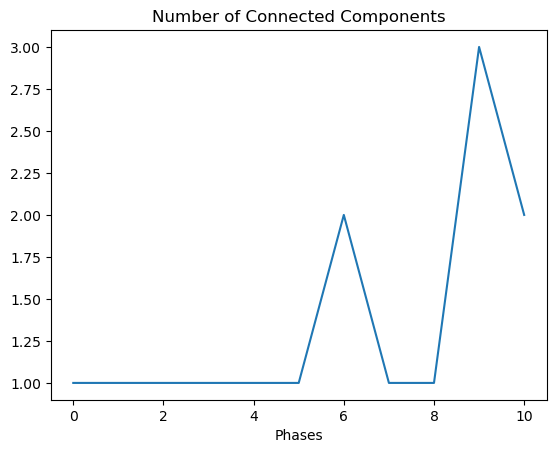

In [52]:
plt.plot(conn_c)
plt.title('Number of Connected Components')
plt.xlabel('Phases')